In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#probs
arm_1 = .50
arm_2 = .25
arm_3 = .80

arms = [ arm_1, arm_2, arm_3]



Text(0.5, 1.0, 'total rewards:797')

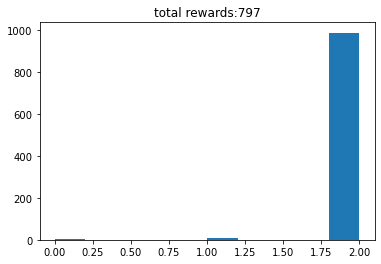

In [6]:
#bayesian agent with thompson sampling
num_levers = 3
alphas = [1 for i in range(3)]
betas = [1 for i in range(3)]
total_reward = 0
actions = []

n = 1000

#pull the arm selected
def pull_arm(current_arm):
    
    base_prob = arms[current_arm]
    
    current_reward = np.random.choice([0, 1], p=[1-base_prob, base_prob])
    
    return current_reward   

def theta_samples(alphas, betas, num_levers):
    return [np.random.beta(alphas[i], betas[i]) for i in range(num_levers)]

def choose_action(thetas):
    return np.argmax(thetas)

def update(alphas, betas, reward, action):
    alphas[action] += reward
    betas[action] += 1 - reward
    return alphas, betas
    
for i in range(n):
    thetas = theta_samples(alphas, betas, num_levers)
    action = choose_action(thetas)
    reward = pull_arm(action) 
    actions.append(action)
    alphas, betas = update(alphas, betas, reward, action)
    total_reward += reward
    
plt.hist(actions)
title = "total rewards:" + str(total_reward)
plt.title(title)